# Principle Component Analysis

In [52]:
import sklearn
sklearn.__all__


['calibration',
 'cluster',
 'covariance',
 'cross_decomposition',
 'datasets',
 'decomposition',
 'dummy',
 'ensemble',
 'exceptions',
 'experimental',
 'externals',
 'feature_extraction',
 'feature_selection',
 'gaussian_process',
 'inspection',
 'isotonic',
 'kernel_approximation',
 'kernel_ridge',
 'linear_model',
 'manifold',
 'metrics',
 'mixture',
 'model_selection',
 'multiclass',
 'multioutput',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised',
 'svm',
 'tree',
 'discriminant_analysis',
 'impute',
 'compose',
 'clone',
 'get_config',
 'set_config',
 'config_context',
 'show_versions']

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
dataset = load_iris()

x = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
y = dataset.target

In [5]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [32]:
pca = PCA(n_components = 2)
pca.__dict__

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None}

In [33]:
pca.fit(x)
x_pca = pca.transform(x)

Text(0, 0.5, '2nd comp')

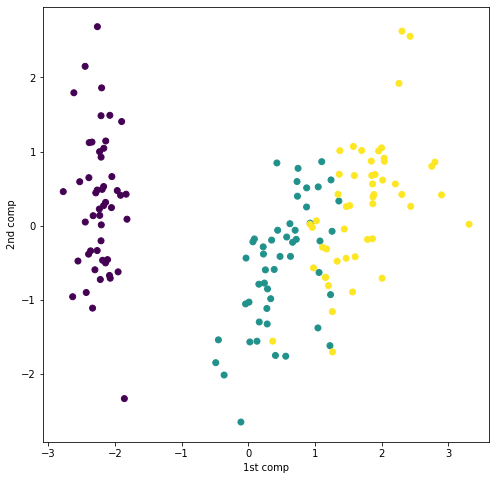

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = y)
plt.xlabel("1st comp")
plt.ylabel("2nd comp")

# KNN (orginal i/p)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [37]:
knn = KNeighborsClassifier()
knn.__dict__

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

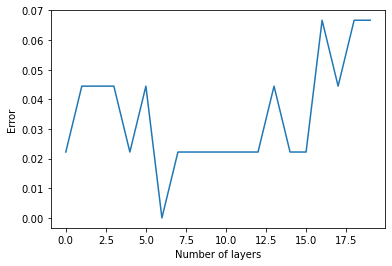

In [38]:
error = []

for i in range(20):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred!=y_test))
    
plt.xlabel("Number of layers")
plt.ylabel("Error")
plt.plot(error)

In [39]:
knn = KNeighborsClassifier(n_neighbors = np.argmin(error))
knn.__dict__
np.argmin(error)

6

In [40]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9555555555555556

In [41]:
pred = knn.predict(x_test)

In [42]:
print(confusion_matrix(y_test, pred))

[[15  0  0]
 [ 0 14  0]
 [ 0  2 14]]


In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# KNN (pca data)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=.3)

In [45]:
knn = KNeighborsClassifier()
knn.__dict__

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

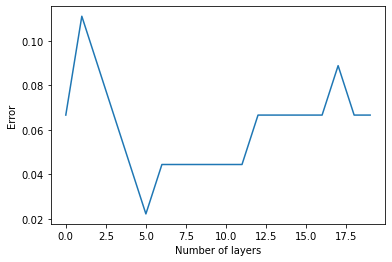

In [46]:
error = []

for i in range(20):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred!=y_test))
    
plt.xlabel("Number of layers")
plt.ylabel("Error")
plt.plot(error)

In [47]:
knn = KNeighborsClassifier(n_neighbors = np.argmin(error))
knn.__dict__
np.argmin(error)

5

In [48]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9555555555555556

In [49]:
pred = knn.predict(x_test)

In [50]:
print(confusion_matrix(y_test, pred))

[[17  0  0]
 [ 0 12  1]
 [ 0  1 14]]


In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        13
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

